# Titanic Feature Engineering

In this section we will analyze what we can get from:
1. Cabin
2. Tickets
3. Name (We will try to derive the person title which can be related to a person's wealth)

In [7]:
import re

import pandas as pd

from loadDataUtils import loadDataUtils

In [8]:
path_train = r'C:\Users\39320\Desktop\myProjects_python\Titanic\data\train.csv'
path_test = r'C:\Users\39320\Desktop\myProjects_python\Titanic\data\test.csv'
data = loadDataUtils(path_train, path_test)

In [9]:
df_train, df_test = data.get_train_and_test()

## About Cabin

first let's go to see the multiple cabins. That is, those elements in the cabin that have more than one value, regardless of the letter or number. Families have multiple cabins

In [43]:
df_train.Cabin
df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this
# letters
# multiple letters
df_train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [121]:
pd.pivot_table(df_train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [128]:
pd.pivot_table(df_train, index = 'cabin_multiple',  values=['Survived'])

,Survived
cabin_multiple,
0,0.299854
1,0.677778
2,0.562500
3,0.500000
4,1.000000


Let's go now to see the cabins according to the letter. The letter corresponds to the deck where the cabins were located. The cabins with the letter A were on top and were the most expensive ones because they were far from the noise of the ship's engines. [https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic]

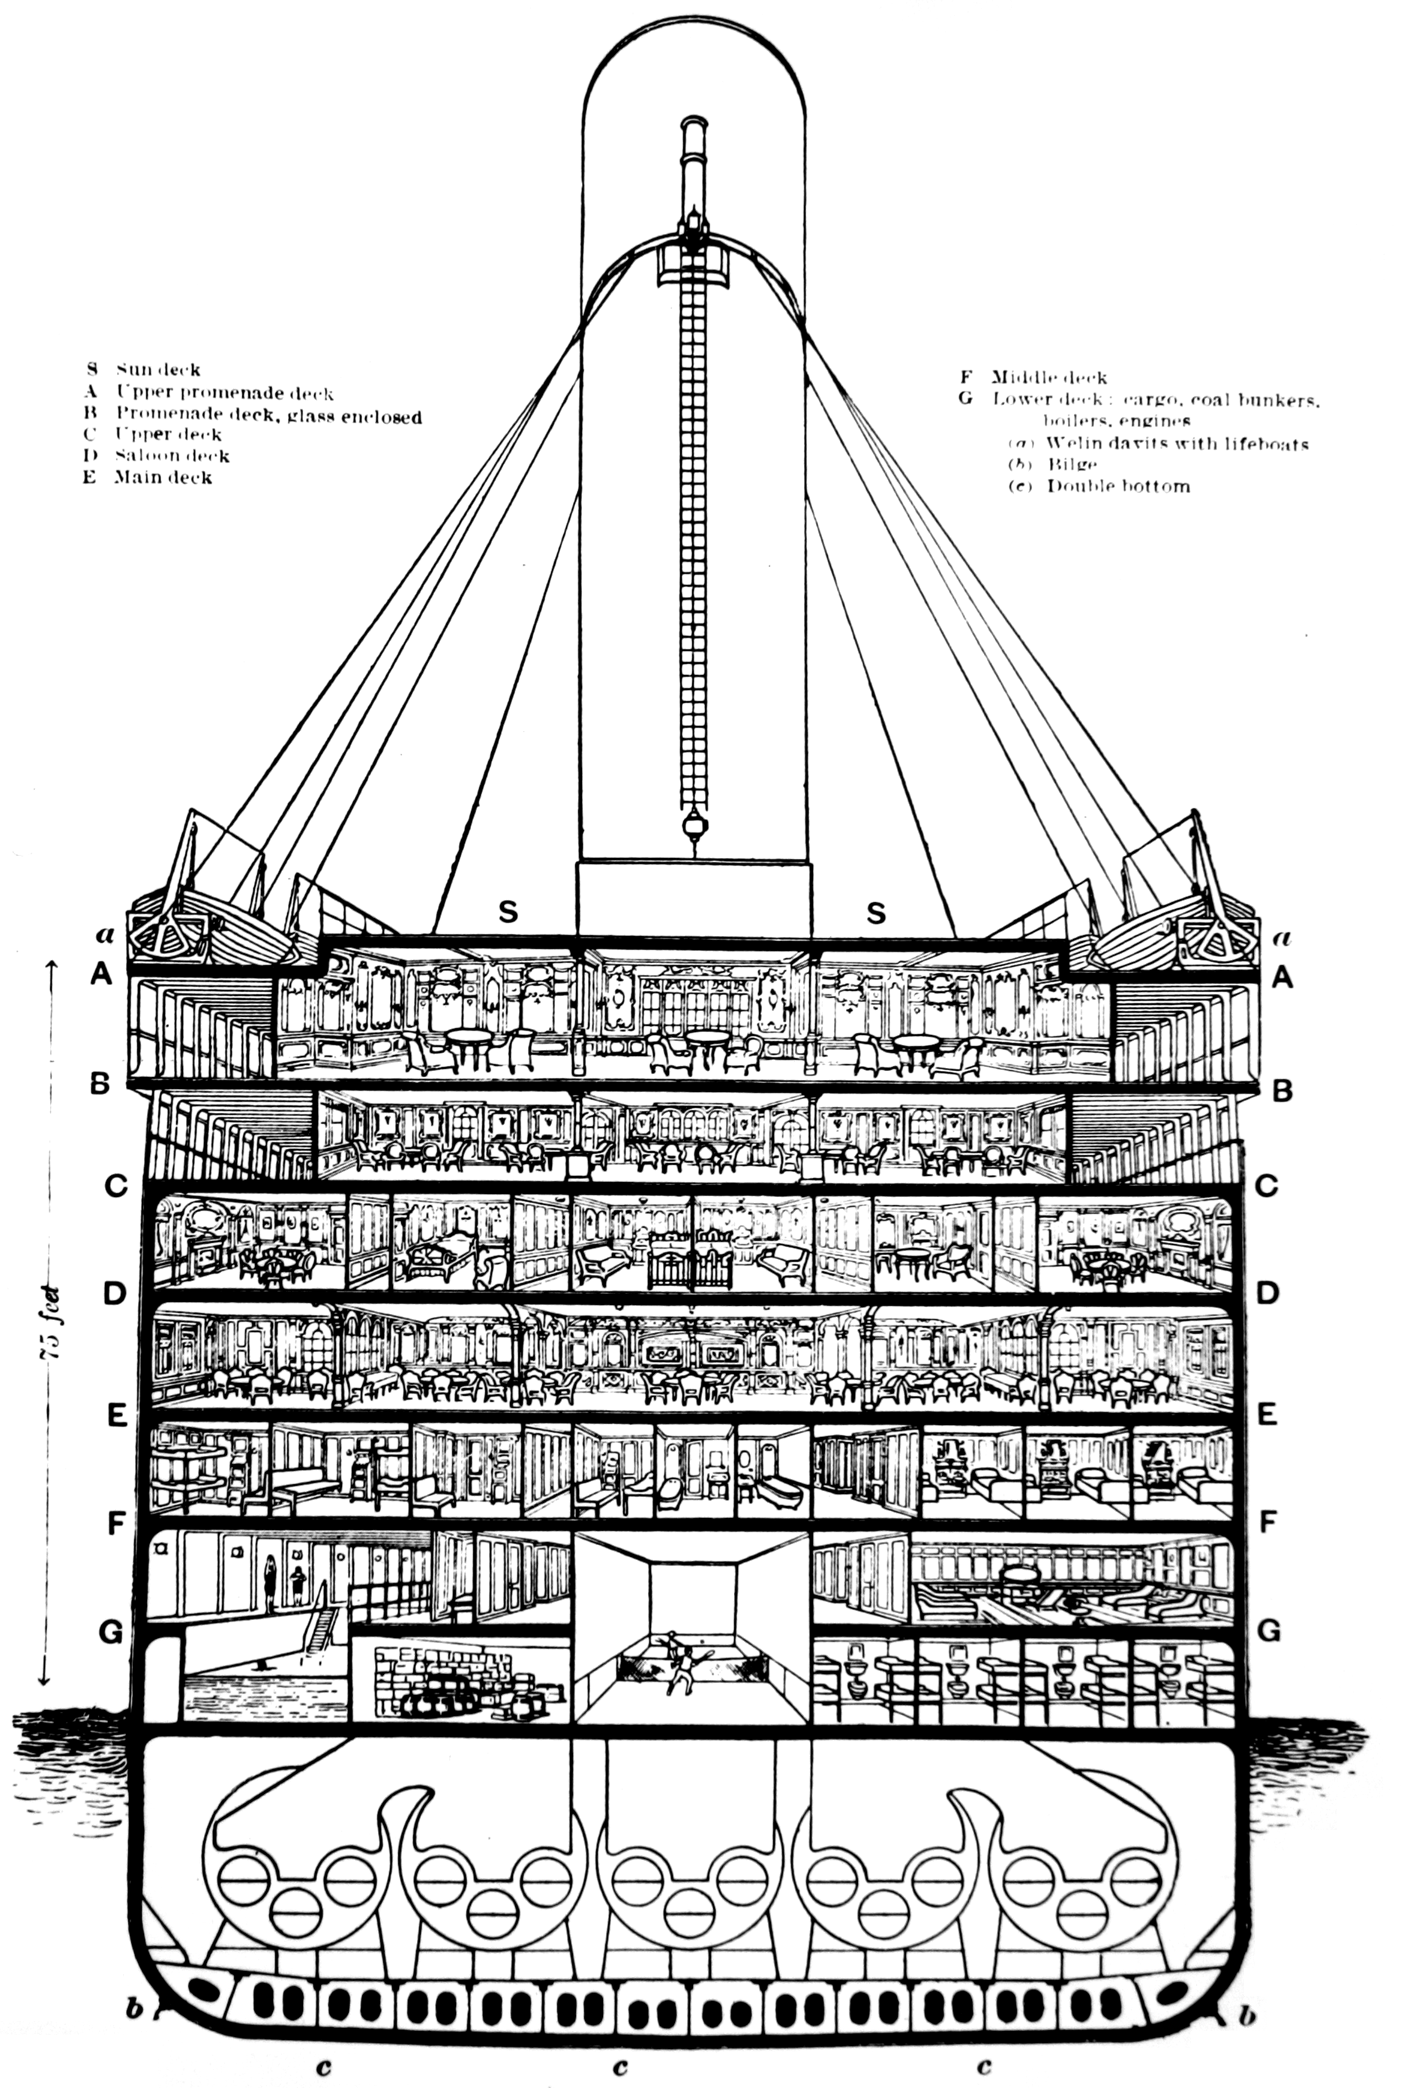

In [132]:
from PIL import Image

# creating a object
im = Image.open('./photo/cabin_position.png')
im

for simplicity in case of multiple cabins we will take the letter of the first cabin.

In [122]:
df_train.Cabin
df_train['cabin_letter'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else  str(x)[0])
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this
# letters
# multiple letters
df_train['cabin_letter'].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [127]:
pd.pivot_table(df_train,index='Survived',columns='cabin_letter', values = 'Name', aggfunc='count')

cabin_letter,0,A,B,C,D,E,F,G,T
Survived,,,,,,,,,
0,481.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0
1,206.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN


In [126]:
pd.pivot_table(df_train, index = 'cabin_letter',  values=['Survived'])

,Survived
cabin_letter,
0,0.299854
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


we see that there is no clear information. It almost seems like the people with the lower cabins were able to survive the most, but I believe this is due to the scarcity of data in this column of the dataframe. In fact, more than 50% of the values are null.

# About Tikets

In [133]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

try to extract only the numerical part of the tikets

In [136]:
df_train['Ticket_num'] = df_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [140]:
df_train['Ticket_num'].value_counts()

1    661
0    230
Name: Ticket_num, dtype: int64

In [149]:
pd.pivot_table(df_train, index='Survived', values='Ticket_num')

,Ticket_num
Survived,
0,0.741348
1,0.742690


In [183]:
pd.pivot_table(df_train,index='Survived',columns='Ticket_num', values = 'Ticket', aggfunc='count')

Ticket_num,0,1
Survived,,
0,142,407
1,88,254


we do not get any useful information. Let's try now with the letters of the Tickets

In [166]:
df_train['Ticket_letter'] = df_train.Ticket.apply(lambda x: 0 if x.isnumeric() else re.sub('[0-9 /.,_-]+', '', str(x).lower()))

df_train['Ticket_letter'].value_counts()

0            661
pc            60
ca            41
a             28
stono         18
sotonoq       15
scparis       11
wc            10
soc            6
c              5
fcc            5
line           4
wep            3
pp             3
sopp           3
sotono         2
scah           2
swpp           2
ppp            2
fc             1
scahbasle      1
as             1
sop            1
sc             1
scow           1
fa             1
sp             1
sca            1
casoton        1
Name: Ticket_letter, dtype: int64

In [181]:
df_train[['Ticket_letter', 'Embarked', 'cabin_letter']].value_counts()
df_train[['Ticket_letter', 'Embarked']].value_counts()
df_train[['Ticket_letter','cabin_letter']].value_counts()

Ticket_letter  cabin_letter
0              0               511
               C                44
ca             0                39
0              B                31
a              0                28
0              D                26
               E                23
pc             0                18
stono          0                18
pc             C                15
sotonoq        0                14
pc             B                13
0              A                12
               F                11
wc             0                10
scparis        0                10
soc            0                 6
pc             E                 6
               D                 5
c              0                 5
fcc            0                 5
line           0                 4
pc             A                 3
scah           0                 2
wep            B                 2
0              G                 2
swpp           0                 2
sotono         0           

even in this case we find nothing in particular to notice. This is normal as tickets or serial numbers and the like never give too much information about it or new information compared to what you can already find

In [184]:
pd.pivot_table(df_train,index='Survived',columns='Ticket_letter', values = 'Ticket', aggfunc='count')

Ticket_letter,0,a,as,c,ca,casoton,fa,fc,fcc,line,...,soc,sop,sopp,sotono,sotonoq,sp,stono,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,407.0,26.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,3.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,254.0,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,1.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [189]:
pd.pivot_table(df_train, index='Ticket_letter', values='Survived')

,Survived
Ticket_letter,
0,0.384266
a,0.071429
as,0.000000
c,0.400000
ca,0.341463
casoton,0.000000
fa,0.000000
fc,0.000000
fcc,0.800000


even in this case we find nothing in particular to notice. This is normal as tickets or serial numbers and the like never give too much information about it or new information compared to what you can already find

# About names

in this case we will try to extract people's titles. Women, children and the rich are expected to be saved. So all those who have as titles Dr., Mrs., Ms. Etc ...

In [240]:
df_train['Name'][50]

'Panula, Master. Juha Niilo'

In [217]:
df_train['name_title'] = df_train.Name.apply(lambda x: re.sub('[.]','', str(re.findall('[a-zA-Z]+[.]', x)[0])))
df_train['name_title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: name_title, dtype: int64

In [218]:
pd.pivot_table(df_train,index='Survived',columns='name_title', values = 'Name', aggfunc='count')

name_title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN
1,NaN,1.0,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0


In [237]:
d1 = pd.pivot_table(df_train, index='name_title', values='Survived')
d2 = pd.pivot_table(df_train, index='name_title', values='Survived', aggfunc='count')
d_merge = pd.merge(d1,d2, 'left', on='name_title')

d_merge[d_merge['Survived_y'] > 5].rename(columns={'name_title': 'name_title', 'Survived_x': 'prob_survive', 'Survived_y': 'Cont_in_name_title'}).sort_values(by='Cont_in_name_title', ascending = False)

,prob_survive,Cont_in_name_title
name_title,,
Mr,0.156673,517
Miss,0.697802,182
Mrs,0.792000,125
Master,0.575000,40
Dr,0.428571,7
Rev,0.000000,6


I only considered lines with more than 5 elements.
We can see how the survival rate among men (Mr.) is much lower than that of married women (Mrs.) and unmarried women (Miss.).
This is probably because they gave them priority to get on the lifeboats and to save themselves. In fact, usually women and children are saved first.
In addition it can be seen that those with the title of Dr. and Master. also have a higher survival rate than the "normal" man (Mr.).
This is probably because they are richer and/or older.

This for sure can be something useful for building the model. However, this information does not necessarily make a substantial difference, it could very well be contained by the combination of other features such as Age and Sex.

“Ms.” actually has its origins in the 1600s but it came into popular use in the 1970s during the women’s movement: more women were entering the workforce.

In the workplace there was no way of knowing if a man were married or single just based on his name or title; women wanted a similar title that did not reveal their marital status and “Ms.” fit the bill.

source [https://www.lezionidinglese.net/blog-inglese/mr-mrs-miss-ms/]

Master's degree. it should be the acronym for boys.
Here all children are referred to as Masters.  [https://www.encyclopedia-titanica.org/children-on-titanic/]

**The title is useful, the ticket is not, and the cabin will probably not be useful for our models either.**